# Can I Mark Zuckenberg my Wine?

<p>
    I am not a beginner wine drinker but I am certainly a beginner in "wine". Even though I enjoy drinking wine I never had the passion to research, learn and explore variety of different wines. So, when I go to a liquor store, the wine section is daunting with thousands of bottles available. </p>

<p>
    I dont want to stare at a bunch of shelves at the liquor store. I want to be able to order the right wine and look like I know what i am doing at the restaurant. I want to pick my wine like Mark Zuckenberg picks his shirt. Effortless!</p>
 

## Data Set

<p>
    I do not have the bandwidth to write a data scraper for wine websites so I grabbed this data straight from <a href="https://data.world/">Data World.</a> . It is a year old and provided by Zack Thout, who is a well known member of data sharing platforms such as Kaggle. A big round of applouse for <a href="https://www.kaggle.com/zynicide">Zack</a>

<p>
    The dataset includes certain characteristic of different wines, where they come from, rates from Wine Enthusiast , price points and regions. </p>

<p>
    As always I am going to start with data wrangling (wrangling sounds sexier than cleaning) process. Basicallly, I am going to convert the data I have from the initial raw format to a better cleaned up version for better analysis. </p>

## Data Wrangling

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv('../input/winemag-data-130k-v2.csv')

In [3]:
df.head(5)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [4]:
df.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')

<p> When I initially look at the data set, I see below columns</p>

<ul>
    <li>Unnamed: Basically index of the data set which we already created along with the dataframe.</li>
    <li>Country: The country that the wine is from</li>
    <li>Description: Explaning the features and characteristics of the wine such as aromas and flavors</li>
    <li>Designation: The vineyard within winery where the grapes that made the wine from</li>
    <li>Points: The number of points Wine Ehthusiast rated the wine on a scale of 1-100</li>
    <li>Price: The cost for bottle of the wine</li>
    <li>Province: The Province or state that the wine is from</li>
    <li>Region_1: The wine growing area in a province or state(ie Napa)</li>
    <li>Region_2:Sometimes there are more specific regions specified within a wine growing area(ie Rutherford inside the Napa Valley)</li>
    <li>Taster_Name: Name of the Taster(a.k.a Wine Enthusiast)</li>
    <li>Taster_Twitter_Handle: Twitter Handle of the Taster (a.k.a Wine Enthusiast)</li>
    <li>Variety: The type of grapes used to make the wine (ie Pinot Noir)</li>
    <li>Winery: The winery that made the wine</li>
    
<p>I am also seeing , several NaN appared in the dataframe; these are the missing values which I need to identify in detail.</p>

In [5]:
missing_data=df.isnull()

In [6]:
missing_data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,False,False,False,False,False,True,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,True,True,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False


True values are representing the missing values. False is telling me that these values are present in the dataset. I am going to figure out how many missing values there are in each column.

In [7]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print('')

Unnamed: 0
False    129971
Name: Unnamed: 0, dtype: int64

country
False    129908
True         63
Name: country, dtype: int64

description
False    129971
Name: description, dtype: int64

designation
False    92506
True     37465
Name: designation, dtype: int64

points
False    129971
Name: points, dtype: int64

price
False    120975
True       8996
Name: price, dtype: int64

province
False    129908
True         63
Name: province, dtype: int64

region_1
False    108724
True      21247
Name: region_1, dtype: int64

region_2
True     79460
False    50511
Name: region_2, dtype: int64

taster_name
False    103727
True      26244
Name: taster_name, dtype: int64

taster_twitter_handle
False    98758
True     31213
Name: taster_twitter_handle, dtype: int64

title
False    129971
Name: title, dtype: int64

variety
False    129970
True          1
Name: variety, dtype: int64

winery
False    129971
Name: winery, dtype: int64



Based on the summary above, each column has 129971 rows of data with 8 columns contatining missing data.

<ul>
    <li>"Country": 63 missing data</li>
    <li>"Designation: 37465 missing data</li>
    <li>"Price": 8996 missing data</li>
    <li>"Province": 63 missing data</li>
    <li>"Region_1": 21247 missing data </li>
    <li>"Region_2": 79460 missing data</li>
    <li>"Taster_Name": 26244 missing data</li>
    <li>"Variety": 1 missing data</li>

Designation, Province, Region_1, Region_2 are all about where the wine is coming from. Considering the fact that I am analyszing this wine data set for my self, I do not need to include all 4 same wine characteristic types in detail. Province will be sufficient enough. I will never ask to see if a restaurant has any selections from " Willamette Valley" (Region_2 and Region_1) or "Avidagos" (Designation). The number of missing data from these columns might also hinder my analysis. The easiest way to deal with these missing data sets in these columns, is to drop the entire columns completely. 

In [8]:
df.drop(columns={'designation', 'region_1', 'region_2'}, inplace=True)

In [9]:
df.head()

,Unnamed: 0,country,description,points,price,province,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,Sicily & Sardinia,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


Column Unnamed is also the duplicate of the index. I can drop that column as well.

In [10]:
df.drop(columns={'Unnamed: 0'}, inplace=True)

Do I really need to know and or use the Taster Name, Taster Twitter Handle? These column values have no impact on any of the wine characteristics (One wine enthusiasts opinion doesnt have a bigger value or impact on the wine compare to another wine enthusiast). So i can get rid of those columns as well.

In [11]:
df.drop(columns={'taster_name', 'taster_twitter_handle'}, inplace=True)

In [12]:
df.head()

,country,description,points,price,province,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,Sicily & Sardinia,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


"Price" column has 8996 missing data. Considering total amount of data values in columns (129971), I can use the average price for these missing data values.

In [13]:
avg_price=df['price'].astype('float').mean(axis=0)

In [14]:
df['price'].replace(np.nan, avg_price, inplace=True)

"Country" and "Province" have 63 missing data values. I am going to look to see if the missing values are for the same row.

In [15]:
missing_data[['country', 'province']]

,country,province
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


Based on the above, missing data values are within the same row. There are only 63 of them, I can simply drop these missing data values in these rows.

In [16]:
df.dropna(subset=['country'], axis=0, inplace=True)

In [17]:
df.dropna(subset=['province'], axis=0, inplace=True)

In [18]:
df.head(5)

,country,description,points,price,province,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,35.363389,Sicily & Sardinia,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.000000,Douro,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.000000,Oregon,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.000000,Michigan,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.000000,Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


I may not neccessarily use the description or title in my analysis but i can certainly include them in my findings as selection of Wine Brands or Wine characteristics. So, I am going to keep them as is.

Checking the data formats within the data set to make sure all data types are correct, will finalize the cleaning (wrangling sorry!) process. 

In [19]:
df.dtypes

country         object
description     object
points           int64
price          float64
province        object
title           object
variety         object
winery          object
dtype: object

They are currently correct. There is nothing to standardize or normalize. Woot!

## Data Analysis

When I start analyzing I am going to look for feature patterns by using visualization.

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

I am pretty sure there is a corroletion between Points and Price. I can also use regression since both column variable types are int64 and float64

In [21]:
df.corr()

,points,price
points,1.000000,0.402178
price,0.402178,1.000000


Naturally there is a correlation between points and price. 

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


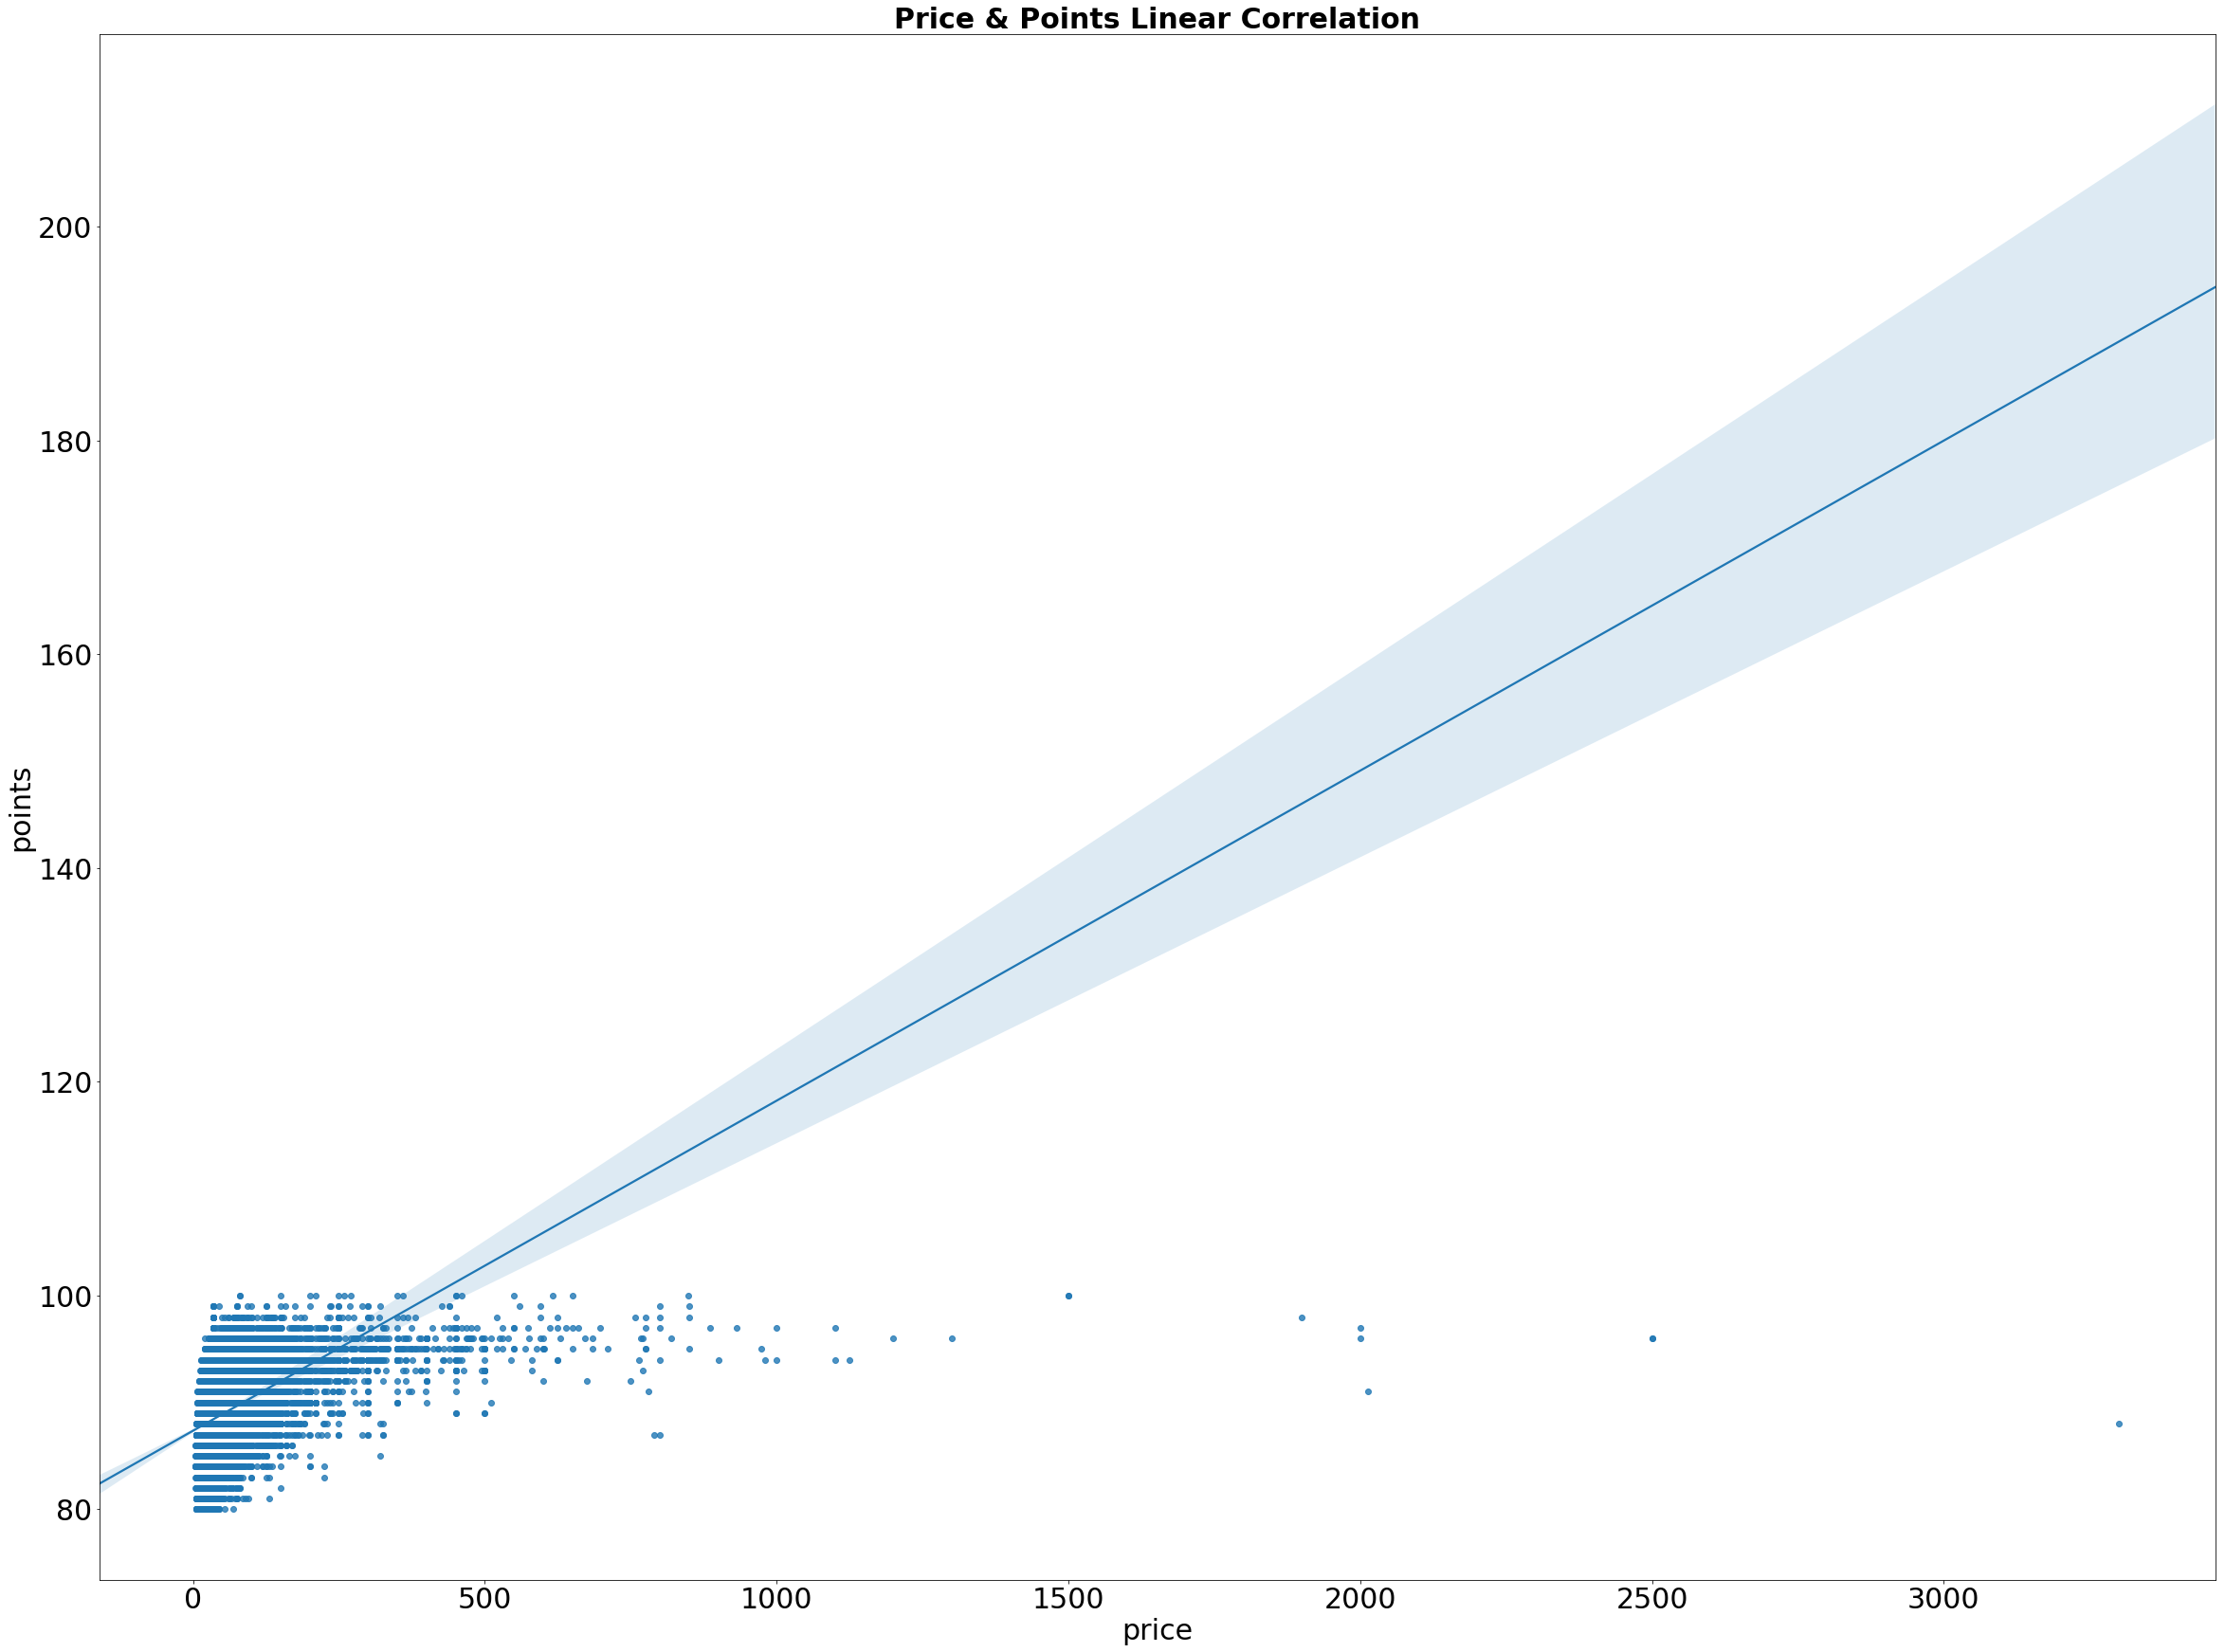

In [22]:
fig, ax = plt.subplots(figsize=(40,30))
plt.xticks(fontsize=30) 
plt.yticks(fontsize=30)
ax.set_title('Price & Points Linear Correlation', fontweight="bold", size=30)
ax.set_ylabel('Points', fontsize = 30)
ax.set_xlabel('Price', fontsize = 30)
sns.regplot(x='price', y='points', data=df)

As the price goes up, the points go up: This indicates a positive direct correlation between these two variables. So Price can be a pretty good predictor of quality of wine (at least according to the wine enthuasist) since the regression line is almost perfect diagonal. 

However, creating a predictive model and use price as the predictor variable does not get to my goal. Solution to the problem in question would be to just buy more expensive wine and get better quality. So, I will need to set a max price so I have other predicive variables to work with.

Besides Points and Price data types, the rest of the column variables types are 'object'. I can't use regression on these data sets as they describe the characteristic of a data unit. They are selected from a small group of categories. These categorical variables have the 'object' type. 

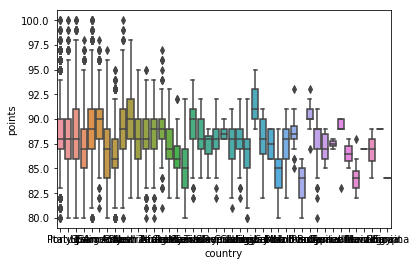

In [23]:
sns.boxplot(x='country', y='points', data=df)

Well, it looks like I need to group the data set with country first.

In [24]:
df_country=df[['country', 'points', 'price']]

In [25]:
df_country.head()

,country,points,price
0,Italy,87,35.363389
1,Portugal,87,15.000000
2,US,87,14.000000
3,US,87,13.000000
4,US,87,65.000000


In [26]:
df_country=df_country.groupby(['country'], as_index=False).mean()
df_country

,country,points,price
0,Argentina,86.710263,24.635787
1,Armenia,87.500000,14.500000
2,Australia,88.580507,35.436547
3,Austria,90.101345,31.513725
4,Bosnia and Herzegovina,86.500000,12.500000
5,Brazil,84.673077,24.881095
6,Bulgaria,87.936170,14.645390
7,Canada,89.369650,35.708522
8,Chile,86.493515,20.968996
9,China,89.000000,18.000000


In [27]:
df_country.dtypes

country     object
points     float64
price      float64
dtype: object

In [28]:
df_country['points'].idxmax()

14

From the data set, it seems English wine are, on average, the best wine.

In [29]:
df_country['points'].idxmin()

30

From the data set, it seems wine from Peru are, on average, the worst wine.

Keep in mind I am looking at correlation and not neccessarily causation. They are completely different as determining correlation is much simpler than determining causation.

I am going to use Pearson Correlation to measure the linear dependence between the Price and Points. 

In [30]:
from scipy import stats

In [31]:
pearson_coef, p_value = stats.pearsonr(df['points'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.40217763015974145  with a P-value of P = 0.0


In [32]:
df.describe()

,points,price
count,129908.000000,129908.000000
mean,88.447047,35.368281
std,3.040066,39.585530
min,80.000000,4.000000
25%,86.000000,18.000000
50%,88.000000,28.000000
75%,91.000000,40.000000
max,100.000000,3300.000000


In [33]:
df_wine=df[['country', 'variety', 'points', 'price']]

In [34]:
df_wine.head()

,country,variety,points,price
0,Italy,White Blend,87,35.363389
1,Portugal,Portuguese Red,87,15.000000
2,US,Pinot Gris,87,14.000000
3,US,Riesling,87,13.000000
4,US,Pinot Noir,87,65.000000


In [35]:
df_wine.set_index('country', inplace=True)

In [36]:
df_wine.head()

,variety,points,price
country,,,
Italy,White Blend,87,35.363389
Portugal,Portuguese Red,87,15.000000
US,Pinot Gris,87,14.000000
US,Riesling,87,13.000000
US,Pinot Noir,87,65.000000


In [37]:
print(df_wine.loc['US'])

                          variety  points  price
country                                         
US                     Pinot Gris      87   14.0
US                       Riesling      87   13.0
US                     Pinot Noir      87   65.0
US             Cabernet Sauvignon      87   19.0
US             Cabernet Sauvignon      87   34.0
US                     Chardonnay      87   12.0
US                       Meritage      87   32.0
US                      Red Blend      87   23.0
US                     Pinot Noir      87   20.0
US                         Merlot      87   22.0
US                     Pinot Noir      87   69.0
US                   Chenin Blanc      86   16.0
US                      Red Blend      86   50.0
US                Sauvignon Blanc      86   20.0
US                     Pinot Noir      86   50.0
US                     Pinot Noir      86   22.0
US                Sauvignon Blanc      86   14.0
US                      Red Blend      86   40.0
US                  

In [38]:
condition=df_wine[['price']]<15.0

In [39]:
df_wine[condition]

,variety,points,price
country,,,
Italy,NaN,NaN,NaN
Portugal,NaN,NaN,NaN
US,NaN,NaN,14.0
US,NaN,NaN,13.0
US,NaN,NaN,NaN
Spain,NaN,NaN,NaN
Italy,NaN,NaN,NaN
France,NaN,NaN,NaN
Germany,NaN,NaN,12.0


In [40]:
df_wine_2=df_wine[(df_wine['variety']=='Cabernet Sauvignon') & (df_wine['price']<15.0) & (df_wine['points']>89)]

In [41]:
df_wine_2.head(100)

,variety,points,price
country,,,
US,Cabernet Sauvignon,90,13.0
US,Cabernet Sauvignon,90,12.0
Bulgaria,Cabernet Sauvignon,90,11.0
US,Cabernet Sauvignon,90,12.0
Bulgaria,Cabernet Sauvignon,90,11.0
Australia,Cabernet Sauvignon,90,13.0
US,Cabernet Sauvignon,90,13.0
Bulgaria,Cabernet Sauvignon,90,14.0
US,Cabernet Sauvignon,90,12.0


In [42]:
df_wine_3=df_wine[(df_wine['variety']=='Pinot Noir') & (df_wine['price']<15.0) & (df_wine['points']>87)]

In [43]:
df_wine_3.head(20)

,variety,points,price
country,,,
US,Pinot Noir,88,10.0
US,Pinot Noir,88,14.0
US,Pinot Noir,90,11.0
US,Pinot Noir,89,13.0
US,Pinot Noir,90,14.0
US,Pinot Noir,89,8.0
US,Pinot Noir,88,8.0
US,Pinot Noir,90,10.0
US,Pinot Noir,90,14.0


The average price I would like to spend on wine is 15 dollars and I would like to be around 87 points or higher for devent quality wine. Based on these variables; if I buy Cabernet I should buy Italian and for Pino Noir I should buy American. One thing I noticed is that I can get better quality Pino Noir for my buck compare to Cabernet. For example: I can purchase a decent Pinot Noir that has 90 points for 14 dollars. However the best Cabernet I can get for 14 dollars is 88 points which is worse quality than a Pinot Noir I can get based on the evaluation from the Wine Enthusiast. So maybe i should have look to see if there are better quality Pino Noir's I can get that costs less than 15 dollars.

In [44]:
df_wine_3=df_wine[(df_wine['variety']=='Pinot Noir') & (df_wine['price']<15.0) & (df_wine['points']>90)]
df_wine_3.head(100)

,variety,points,price
country,,,
Austria,Pinot Noir,92,14.0
US,Pinot Noir,91,14.0
US,Pinot Noir,91,12.0


I can actually get one of the best Pinot Noir for 14 dollars. It is from Austria. I will further analyze the regions of both US and Austria Pinot Noirs but first let me look at the other variety of wines for comparison. 

In [45]:
df_wine_4=df_wine[(df_wine['variety']=='Pinot Gris') & (df_wine['price']<15.0) & (df_wine['points']>90)]

In [46]:
df_wine_4.head(100)

,variety,points,price
country,,,
US,Pinot Gris,91,13.0
US,Pinot Gris,91,12.0
US,Pinot Gris,91,12.0
US,Pinot Gris,91,14.0
US,Pinot Gris,92,12.0


In [47]:
df_wine_5=df_wine[(df_wine['variety']=='Chardonnay') & (df_wine['price']<15.0) & (df_wine['points']>90)]

In [48]:
df_wine_5.head(100)

,variety,points,price
country,,,
US,Chardonnay,91,13.0
US,Chardonnay,91,13.0
US,Chardonnay,91,13.0


In [49]:
df_wine_6=df_wine[(df_wine['variety']=='Merlot') & (df_wine['price']<15.0) & (df_wine['points']>90)]

In [50]:
df_wine_6.head(100)

,variety,points,price
country,,,
US,Merlot,91,13.0


In [51]:
df_wine

,variety,points,price
country,,,
Italy,White Blend,87,35.363389
Portugal,Portuguese Red,87,15.000000
US,Pinot Gris,87,14.000000
US,Riesling,87,13.000000
US,Pinot Noir,87,65.000000
Spain,Tempranillo-Merlot,87,15.000000
Italy,Frappato,87,16.000000
France,Gewürztraminer,87,24.000000
Germany,Gewürztraminer,87,12.000000


In [52]:
df_wine_7=df_wine[(df_wine['variety']=='Malbec') & (df_wine['price']<15.0) & (df_wine['points']>90)]

In [53]:
df_wine_7.head(100)

,variety,points,price
country,,,
Argentina,Malbec,91,12.0
Argentina,Malbec,91,12.0
France,Malbec,92,13.0


In [54]:
df_wine_8=df_wine[(df_wine['variety']=='Shiraz') & (df_wine['price']<15.0) & (df_wine['points']>90)]

In [55]:
df_wine_8.head(100)

,variety,points,price
country,,,
Portugal,Shiraz,91,13.0
Portugal,Shiraz,91,13.0
India,Shiraz,91,12.0


In [56]:
df.head(5)

,country,description,points,price,province,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,35.363389,Sicily & Sardinia,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.000000,Douro,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.000000,Oregon,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.000000,Michigan,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.000000,Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [57]:
df_from=df[['country', 'variety', 'points', 'province']]

In [58]:
df_from.head()

,country,variety,points,province
0,Italy,White Blend,87,Sicily & Sardinia
1,Portugal,Portuguese Red,87,Douro
2,US,Pinot Gris,87,Oregon
3,US,Riesling,87,Michigan
4,US,Pinot Noir,87,Oregon


In [59]:
df_from.set_index('country', inplace=True)

In [60]:
df_from.head()

,variety,points,province
country,,,
Italy,White Blend,87,Sicily & Sardinia
Portugal,Portuguese Red,87,Douro
US,Pinot Gris,87,Oregon
US,Riesling,87,Michigan
US,Pinot Noir,87,Oregon


In [61]:
american=df_from.loc['US']

In [62]:
american.head()

,variety,points,province
country,,,
US,Pinot Gris,87,Oregon
US,Riesling,87,Michigan
US,Pinot Noir,87,Oregon
US,Cabernet Sauvignon,87,California
US,Cabernet Sauvignon,87,California


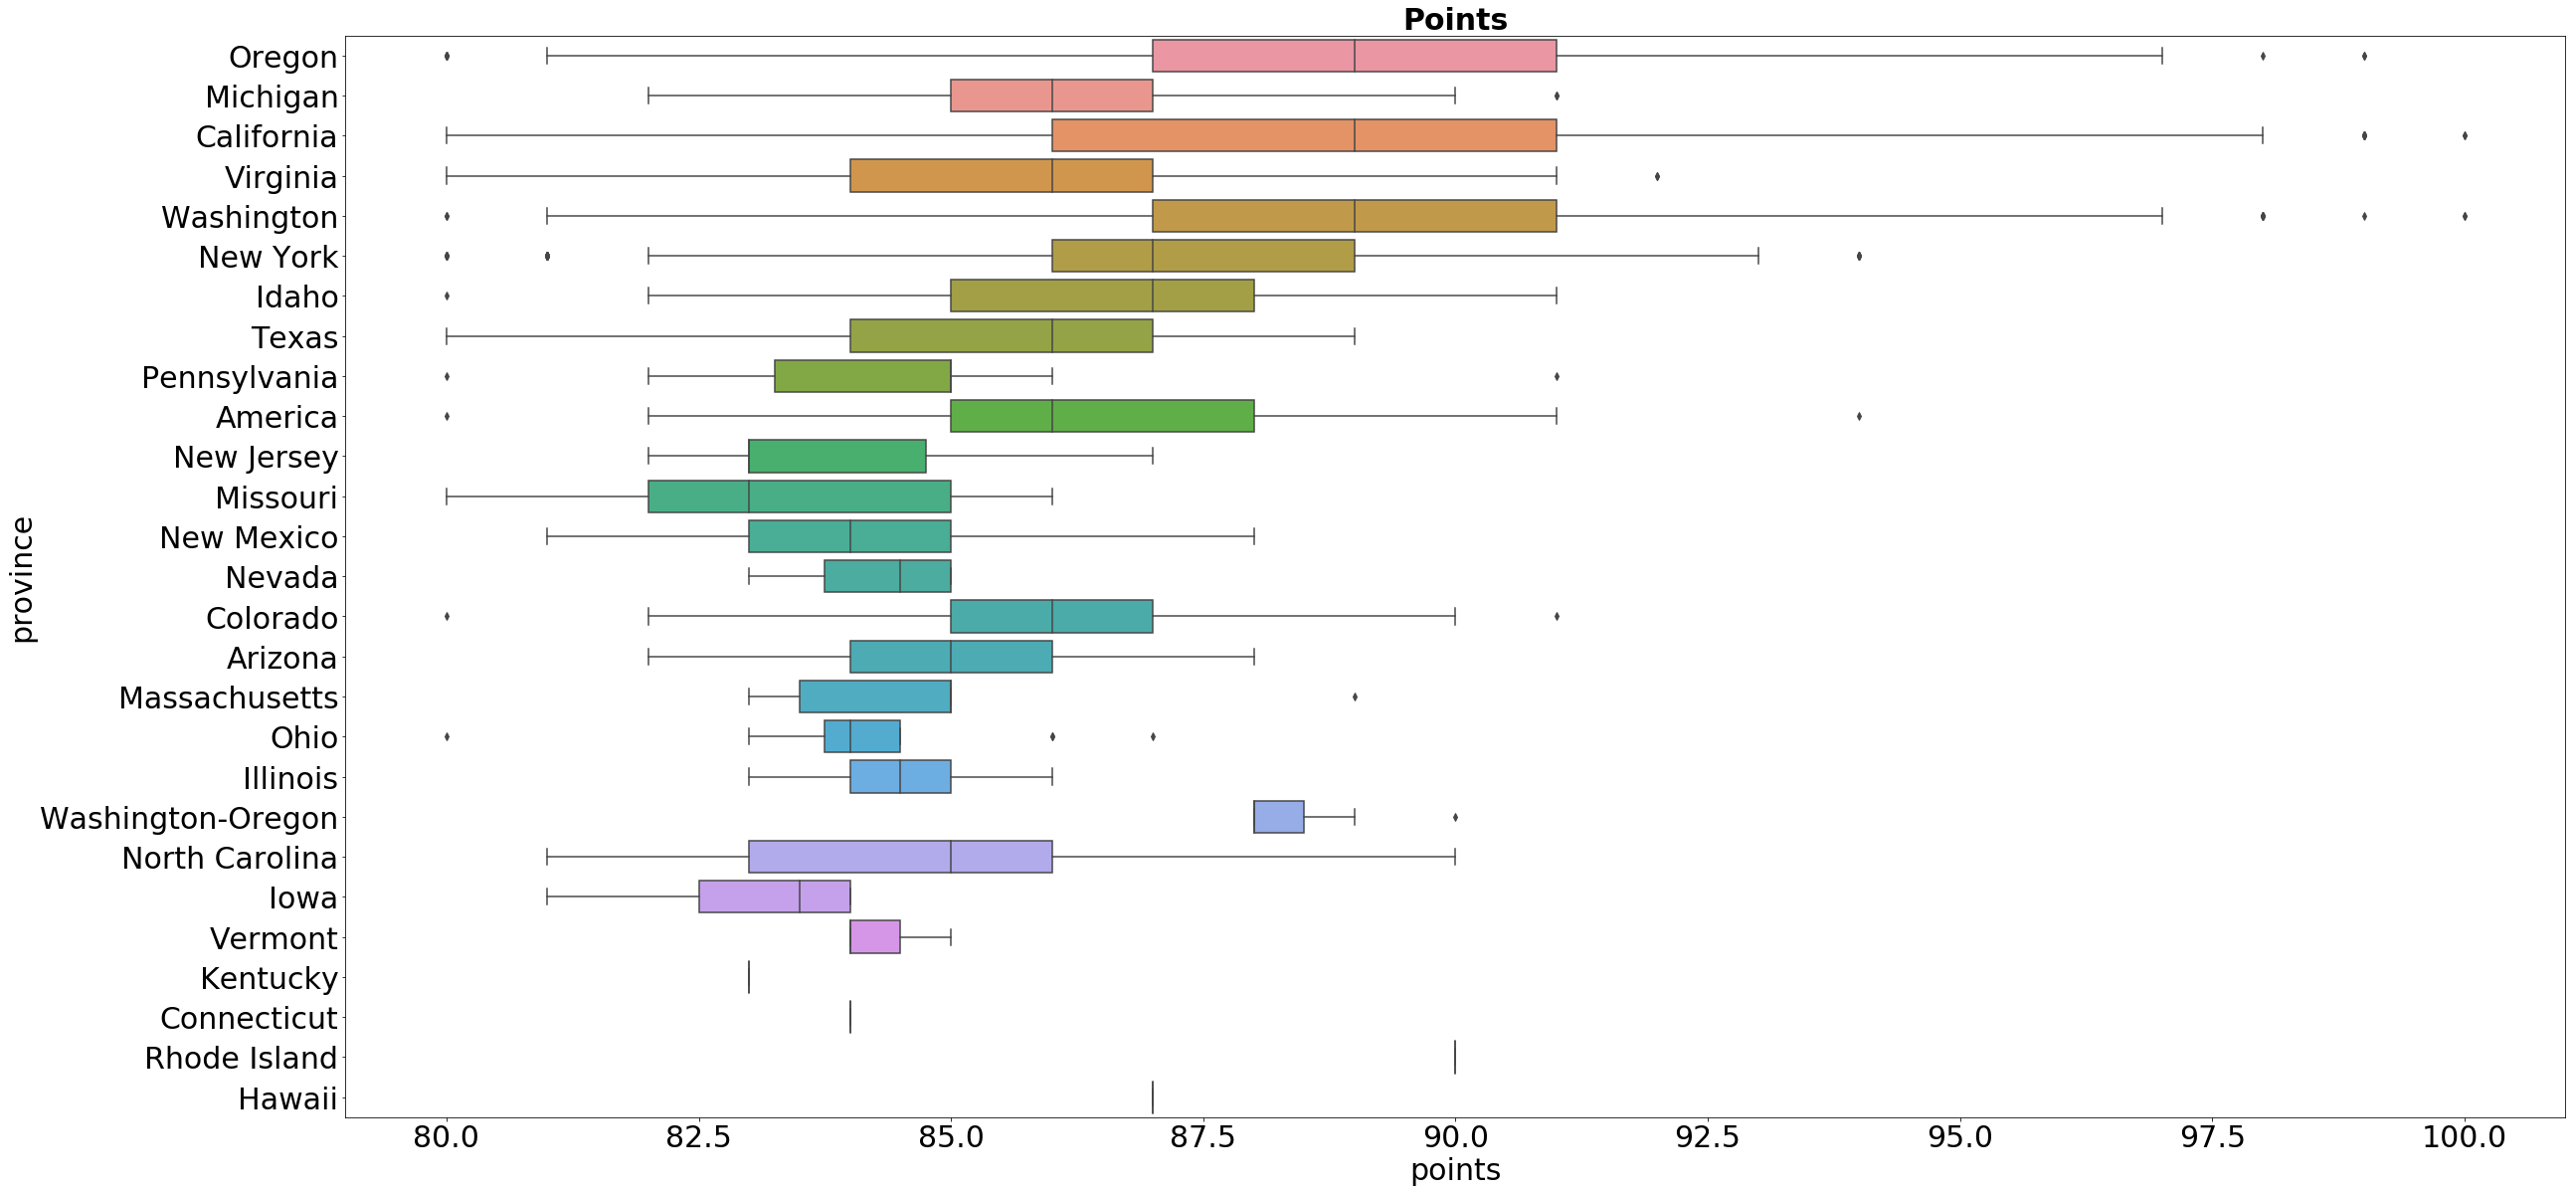

In [63]:
fig, ax = plt.subplots(figsize=(40,20))
plt.xticks(fontsize=30) 
plt.yticks(fontsize=30)
ax.set_title('Points', fontweight="bold", size=30)
ax.set_ylabel('Province', fontsize = 30)
ax.set_xlabel('Points', fontsize = 30)
sns.boxplot(x='points', y='province', data=american)

Based on this analysis; the best wines in the US is coming from Oregon, California and Washingon. 

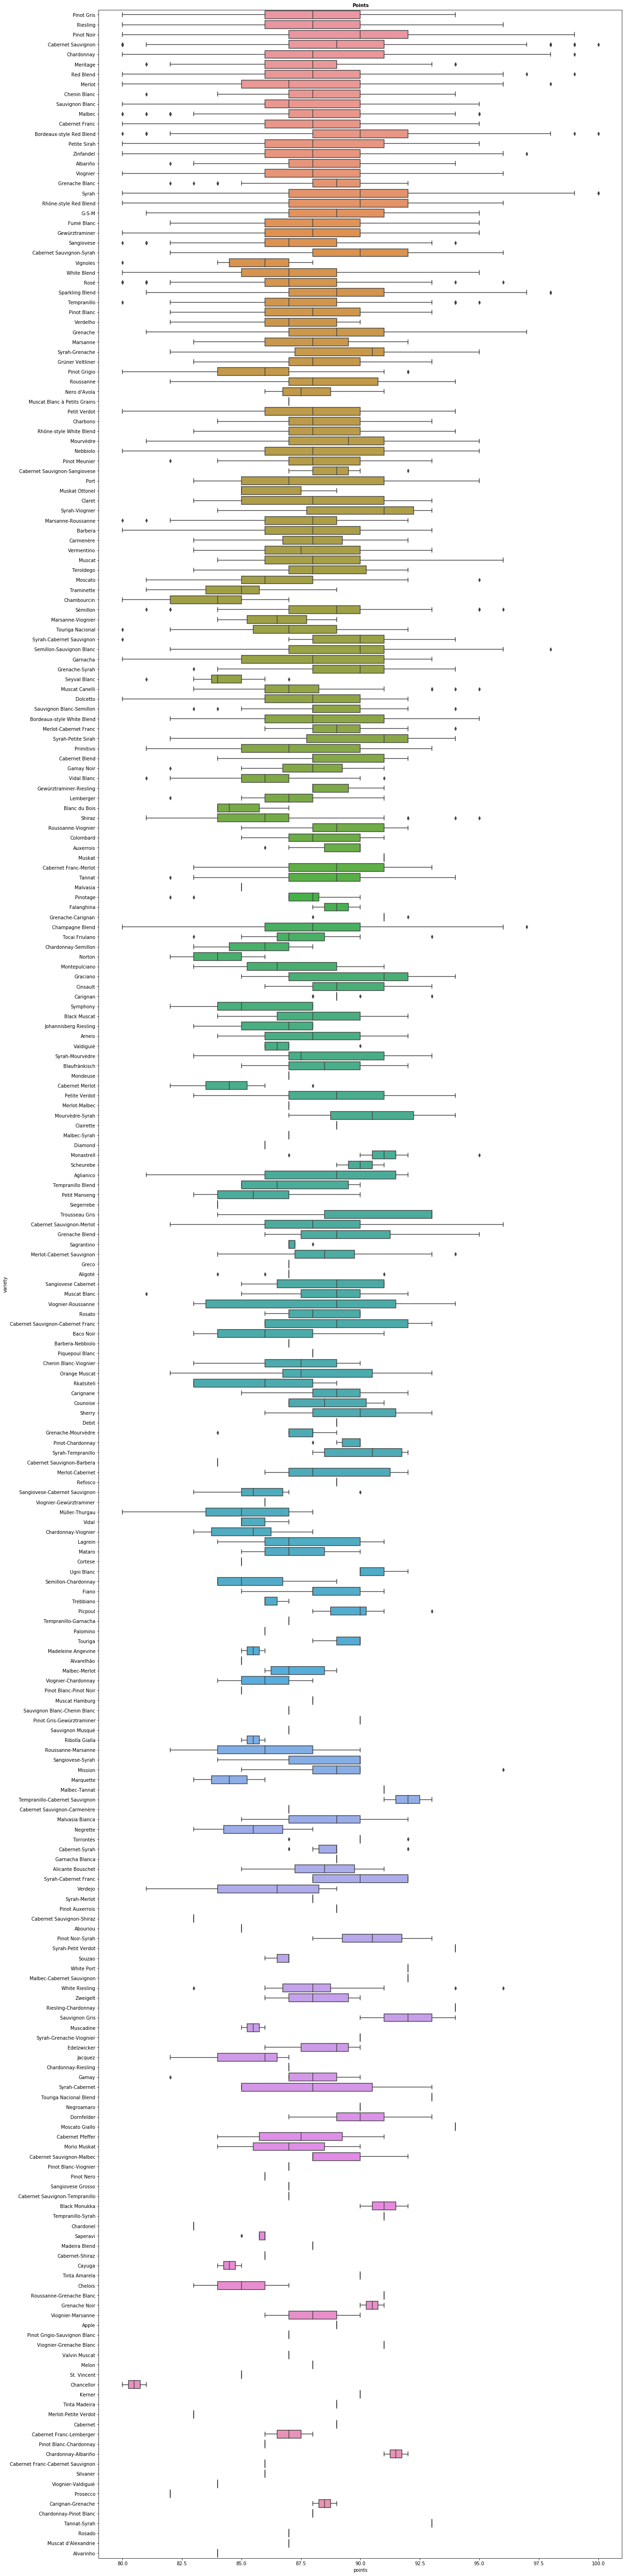

In [64]:
fig, ax = plt.subplots(figsize=(20,100))
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10)
ax.set_title('Points', fontweight="bold", size=10)
ax.set_ylabel('Variety', fontsize = 10)
ax.set_xlabel('Points', fontsize = 10)
sns.boxplot(x='points', y='variety', data=american)

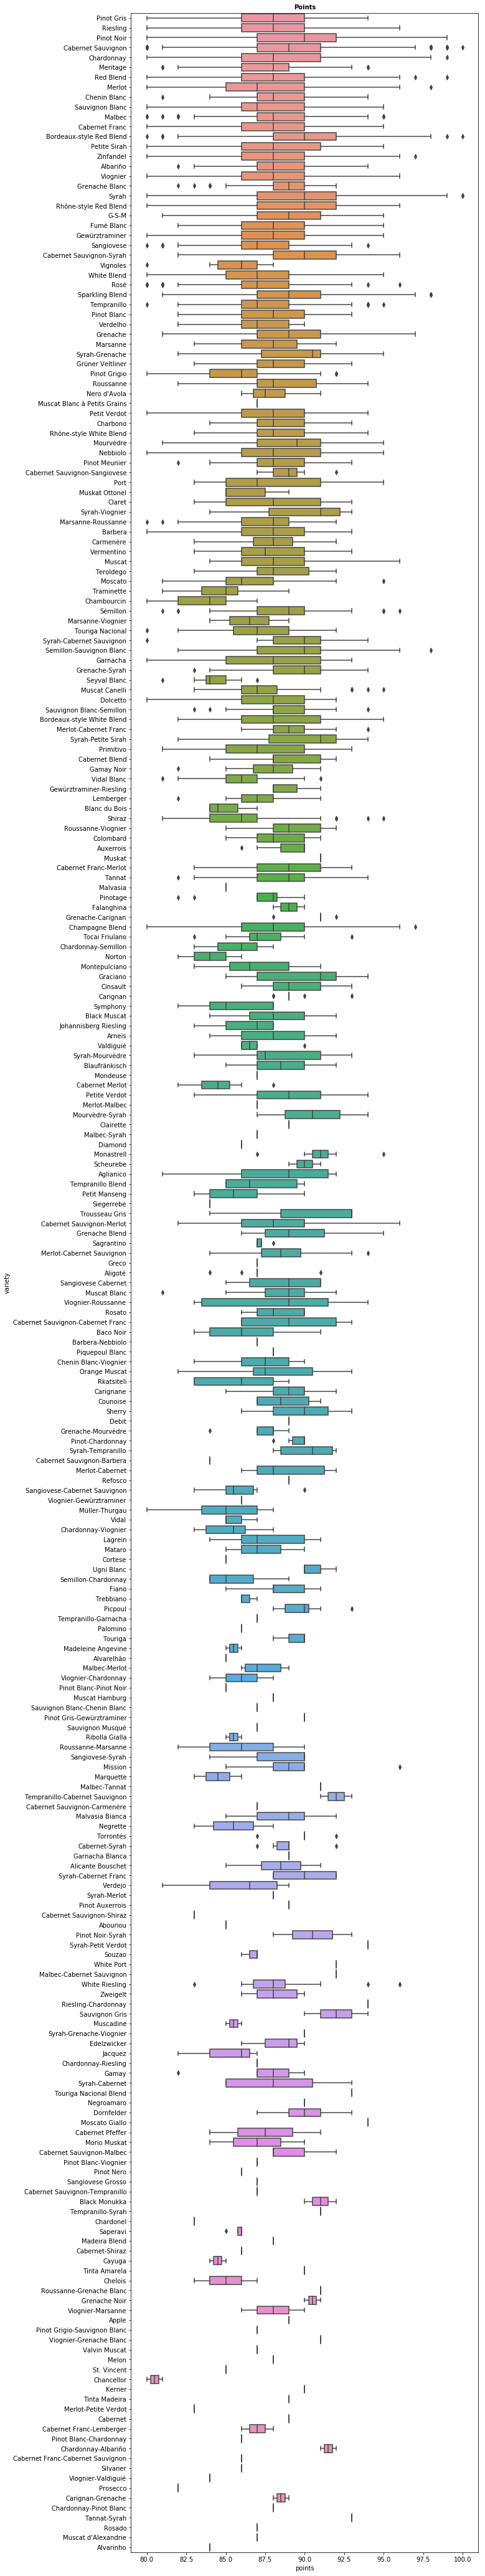

In [65]:
fig, ax = plt.subplots(figsize=(10,75))
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10)
ax.set_title('Points', fontweight="bold", size=10)
ax.set_ylabel('Variety', fontsize = 10)
ax.set_xlabel('Points', fontsize = 10)
sns.boxplot(x='points', y='variety', data=american)

Based on above, in terms of wines from US, I should drink, Cabernet Sauvignon-Malbec, Marquette, Sangiovese-Syrah, Touriga, MErlot-Cabernet, Pino Noir, Canerbet

In [66]:
df_from.head()

,variety,points,province
country,,,
Italy,White Blend,87,Sicily & Sardinia
Portugal,Portuguese Red,87,Douro
US,Pinot Gris,87,Oregon
US,Riesling,87,Michigan
US,Pinot Noir,87,Oregon


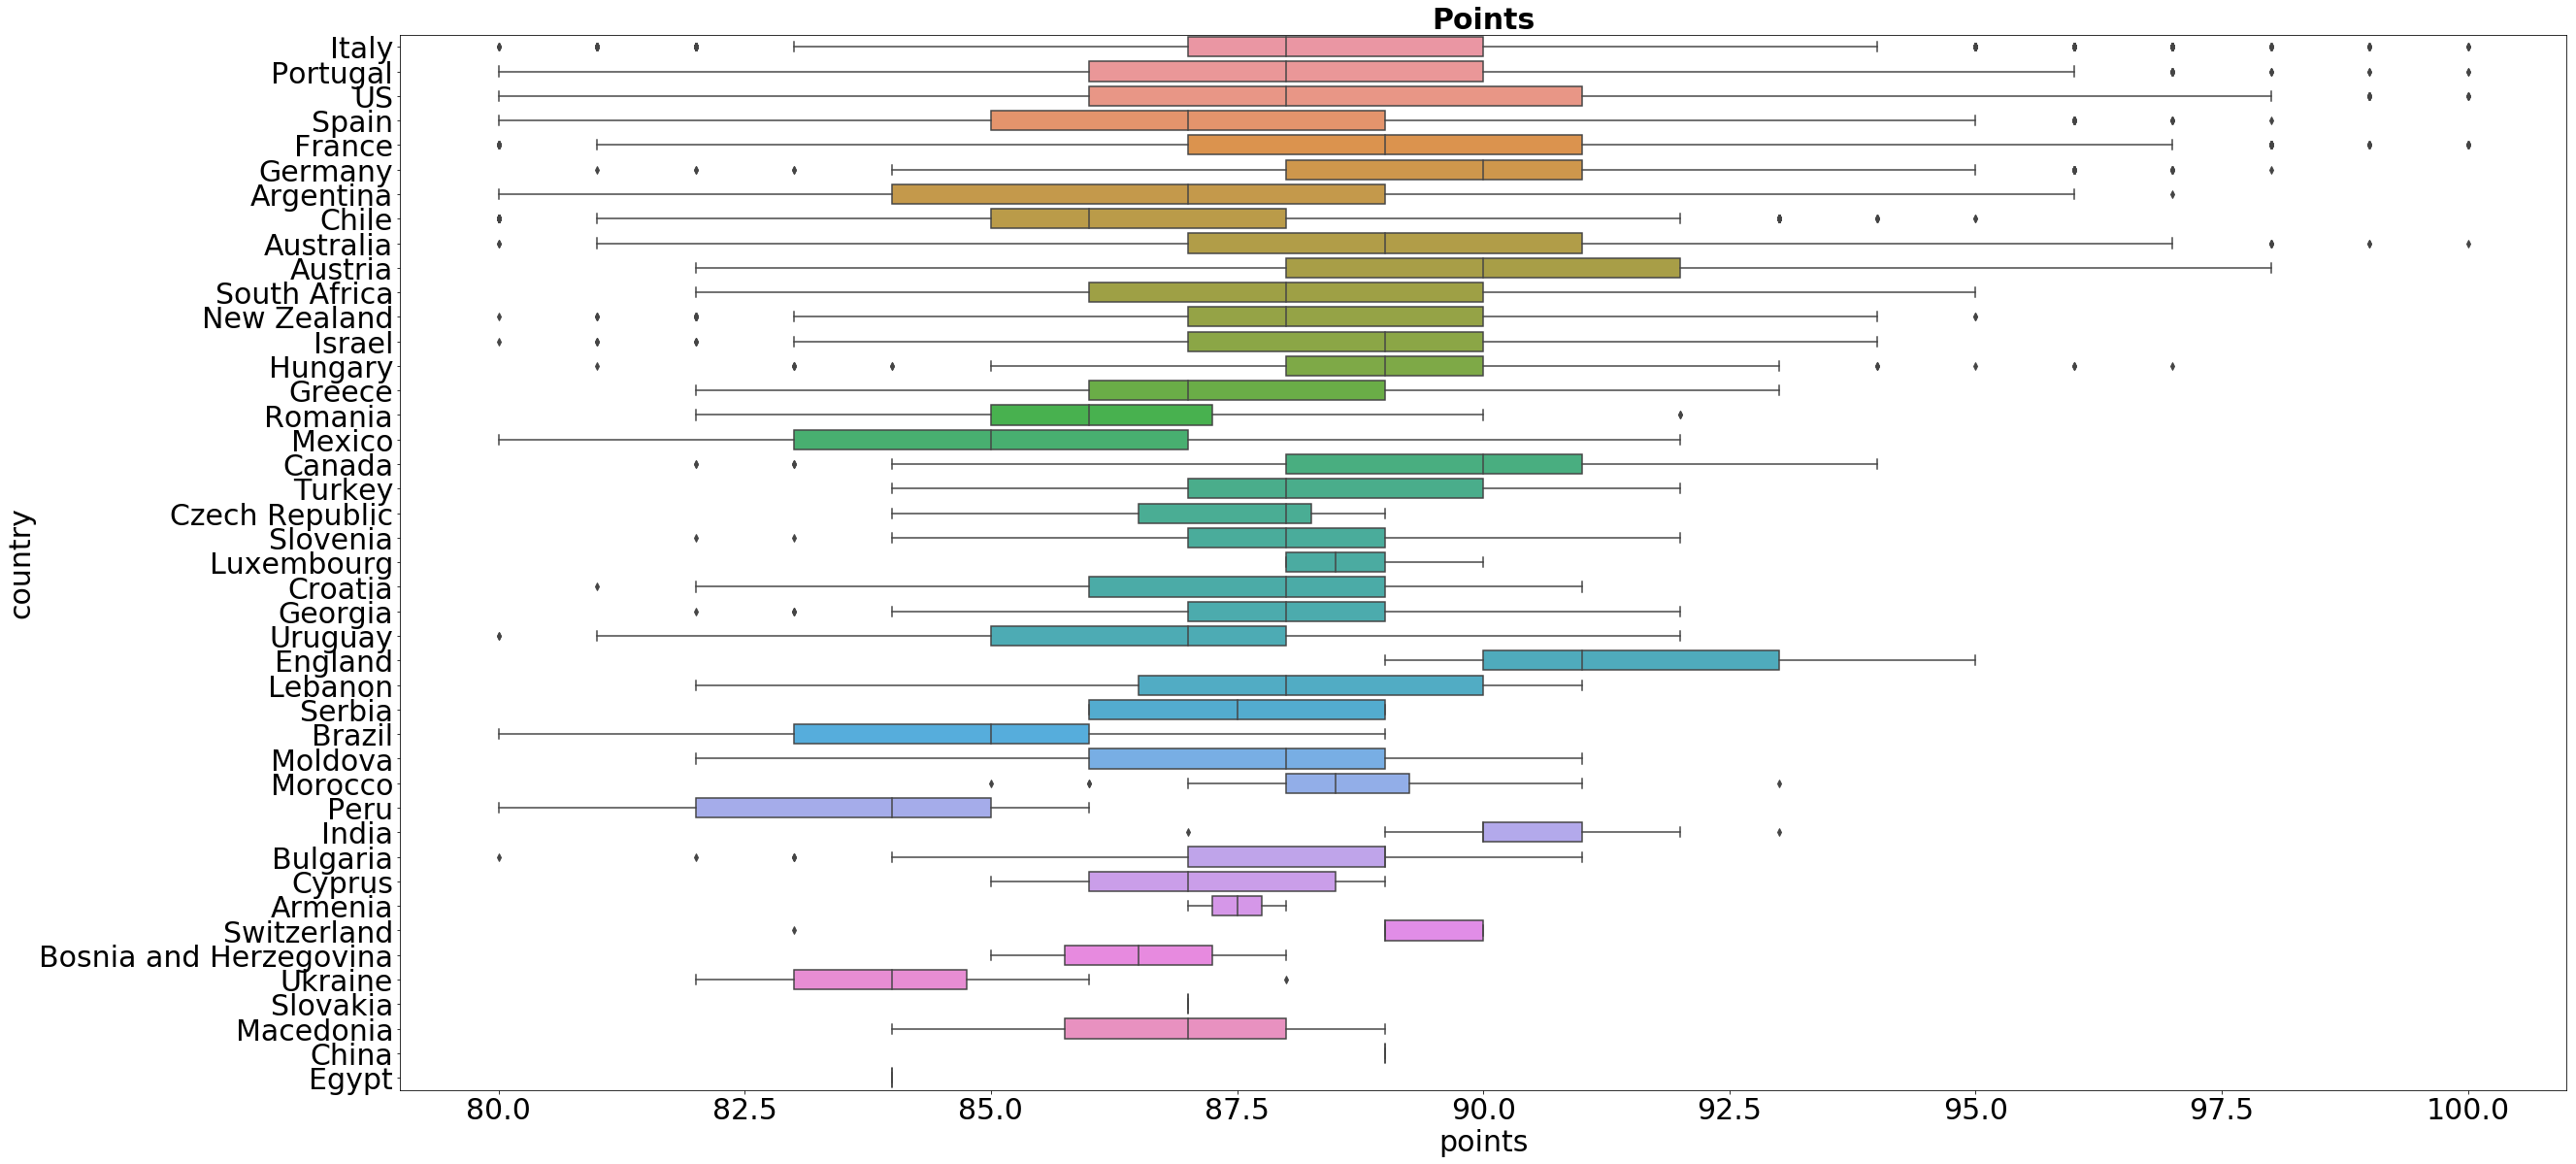

In [67]:
fig, ax = plt.subplots(figsize=(40,20))
plt.xticks(fontsize=30) 
plt.yticks(fontsize=30)
ax.set_title('Points', fontweight="bold", size=30)
ax.set_ylabel('Country', fontsize = 30)
ax.set_xlabel('Points', fontsize = 30)
sns.boxplot(x='points', y='country', data=df)

Based on above, I should drink;
<ul>
    <li>American</li>
    <li>French</li>
    <li>German</li>
    <li>Australia</li>
    <li>Austria</li>
    <li>Canada</li>
    <li>England</li>
    <li>India</li>
    <li>Switzerland</li>
</ul>

Couple things that i notice here; Italy, Spain and Portugal doesnt make it to the list. So maybe it is related to the price point. Let me do a price analysis for these countries.

In [68]:
df_Canada=df[(df['country']=='Canada') & (df['price']<15.0) & (df['points']>87)]

In [69]:
df_Canada.head()

,country,description,points,price,province,title,variety,winery
47945,Canada,Bright orange and pretty white floral aromas m...,88,12.0,Ontario,Cave Spring 2008 Riesling (Niagara Peninsula),Riesling,Cave Spring
129471,Canada,Coming from five different vineyards across th...,88,13.0,Ontario,Cave Spring 2011 Riesling (Niagara Peninsula),Riesling,Cave Spring


Wine from Canada , my preference should be Riesling. Possibly from Ontario. However As we see above there is nothing from Canada that is good and below 15 dollars. So I am going to replace Canada with Italy. Here is my new list;

<ul>
    <li>American</li>
    <li>French</li>
    <li>German</li>
    <li>Australia</li>
    <li>Austria</li>
    <li>Italy</li>
    <li>England</li>
    <li>India</li>
    <li>Switzerland</li>
</ul>

Let me do the same for England and India. I have a feeling, i am going to run into the same problem.

In [70]:
df_India=df[(df['country']=='India') & (df['price']<15.0) & (df['points']>89)]
df_India.head(100)

,country,description,points,price,province,title,variety,winery
37225,India,"Pineapple, grapefruit, and apricot show bright...",90,10.0,Nashik,Sula 2013 Chenin Blanc (Nashik),Chenin Blanc,Sula
56903,India,"Aromas of blackberry, cherry preserves, white ...",91,12.0,Nashik,Sula 2012 Estate Bottled Shiraz (Nashik),Shiraz,Sula
83622,India,"Pineapple, grapefruit, and apricot show bright...",90,10.0,Nashik,Sula 2013 Chenin Blanc (Nashik),Chenin Blanc,Sula
83634,India,"Aromas of pink grapefruit, grass and coriander...",90,12.0,Nashik,Sula 2013 Sauvignon Blanc (Nashik),Sauvignon Blanc,Sula
88134,India,"Dark violet-red in color, this wine has a bouq...",90,13.0,Nashik,Sula 2015 Estate Bottled Shiraz (Nashik),Shiraz,Sula


In [71]:
df_England=df[(df['country']=='England') & (df['price']<15.0) & (df['points']>87)]
df_England.head(100)

,country,description,points,price,province,title,variety,winery


There are some good wines that is under 15 dollars from India. Shiraz, Chenin Blanc, Saivignon Blanc. All from Vinery called Sula which is in Nashik province. England as expected; decent quality wine , under 15 dollars doesnt exist. So I am going to replace with Portugal. 

So Final list of countries:

<ul>
    <li>American</li>
    <li>French</li>
    <li>German</li>
    <li>Australia</li>
    <li>Austria</li>
    <li>Italy</li>
    <li>Portuguese</li>
    <li>India</li>
    <li>Switzerland</li>
</ul>

In [72]:
df_country.head(50)

,country,points,price
0,Argentina,86.710263,24.635787
1,Armenia,87.500000,14.500000
2,Australia,88.580507,35.436547
3,Austria,90.101345,31.513725
4,Bosnia and Herzegovina,86.500000,12.500000
5,Brazil,84.673077,24.881095
6,Bulgaria,87.936170,14.645390
7,Canada,89.369650,35.708522
8,Chile,86.493515,20.968996
9,China,89.000000,18.000000


In [73]:
italian=df_from.loc['Italy']
italian.head()

,variety,points,province
country,,,
Italy,White Blend,87,Sicily & Sardinia
Italy,Frappato,87,Sicily & Sardinia
Italy,Nerello Mascalese,87,Sicily & Sardinia
Italy,White Blend,87,Sicily & Sardinia
Italy,Nero d'Avola,87,Sicily & Sardinia


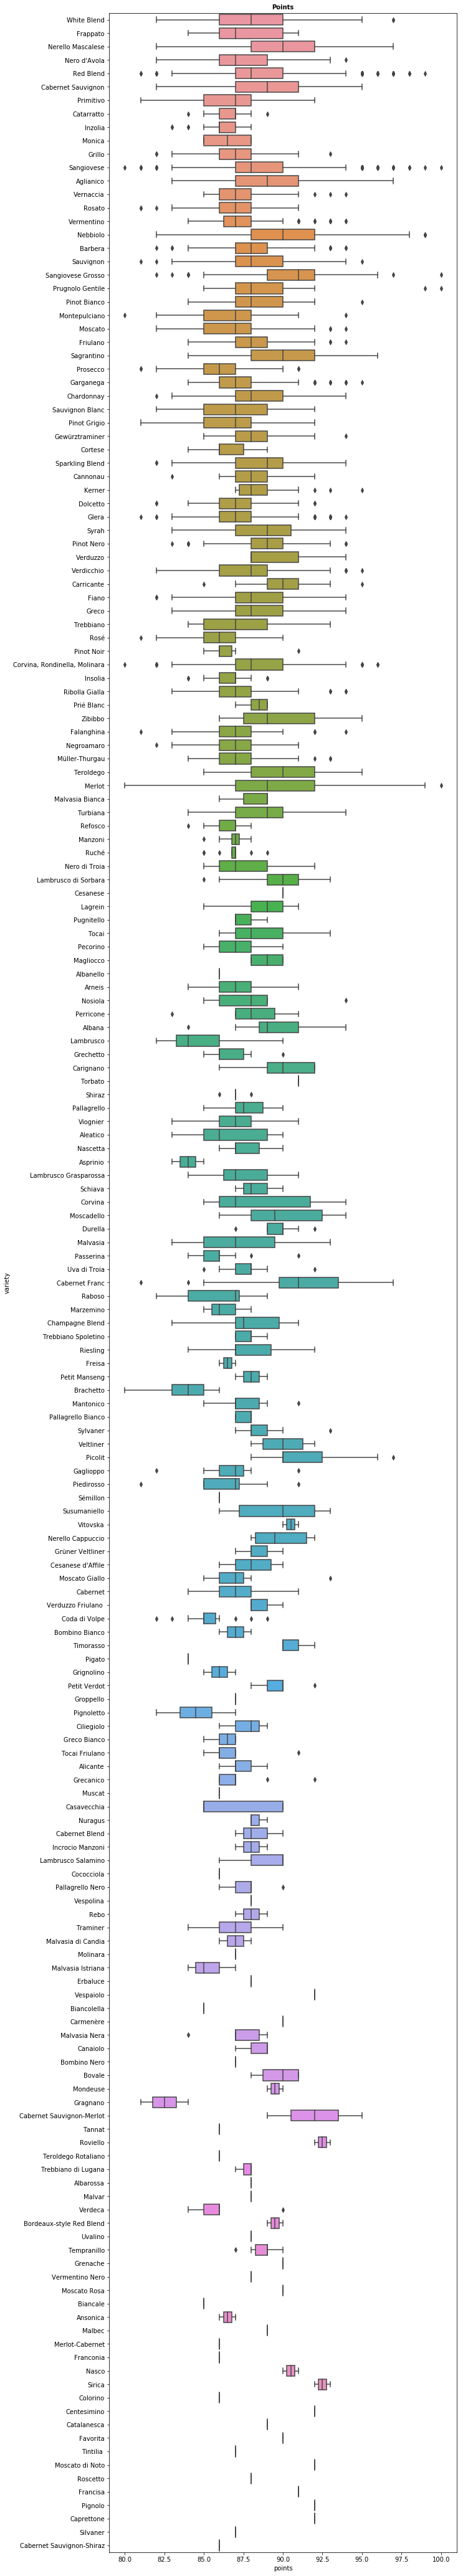

In [74]:
fig, ax = plt.subplots(figsize=(10,75))
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10)
ax.set_title('Points', fontweight="bold", size=10)
ax.set_ylabel('Variety', fontsize = 10)
ax.set_xlabel('Points', fontsize = 10)
sns.boxplot(x='points', y='variety', data=italian)

Based on this analysis, in terms of wines from Italy, I should drink Cabernet Franc and Cabernet Sauvignon.

In [75]:
french=df_from.loc['France']
french.head()

,variety,points,province
country,,,
France,Gewürztraminer,87,Alsace
France,Pinot Gris,87,Alsace
France,Gewürztraminer,87,Alsace
France,Gamay,86,Beaujolais
France,Gamay,86,Beaujolais


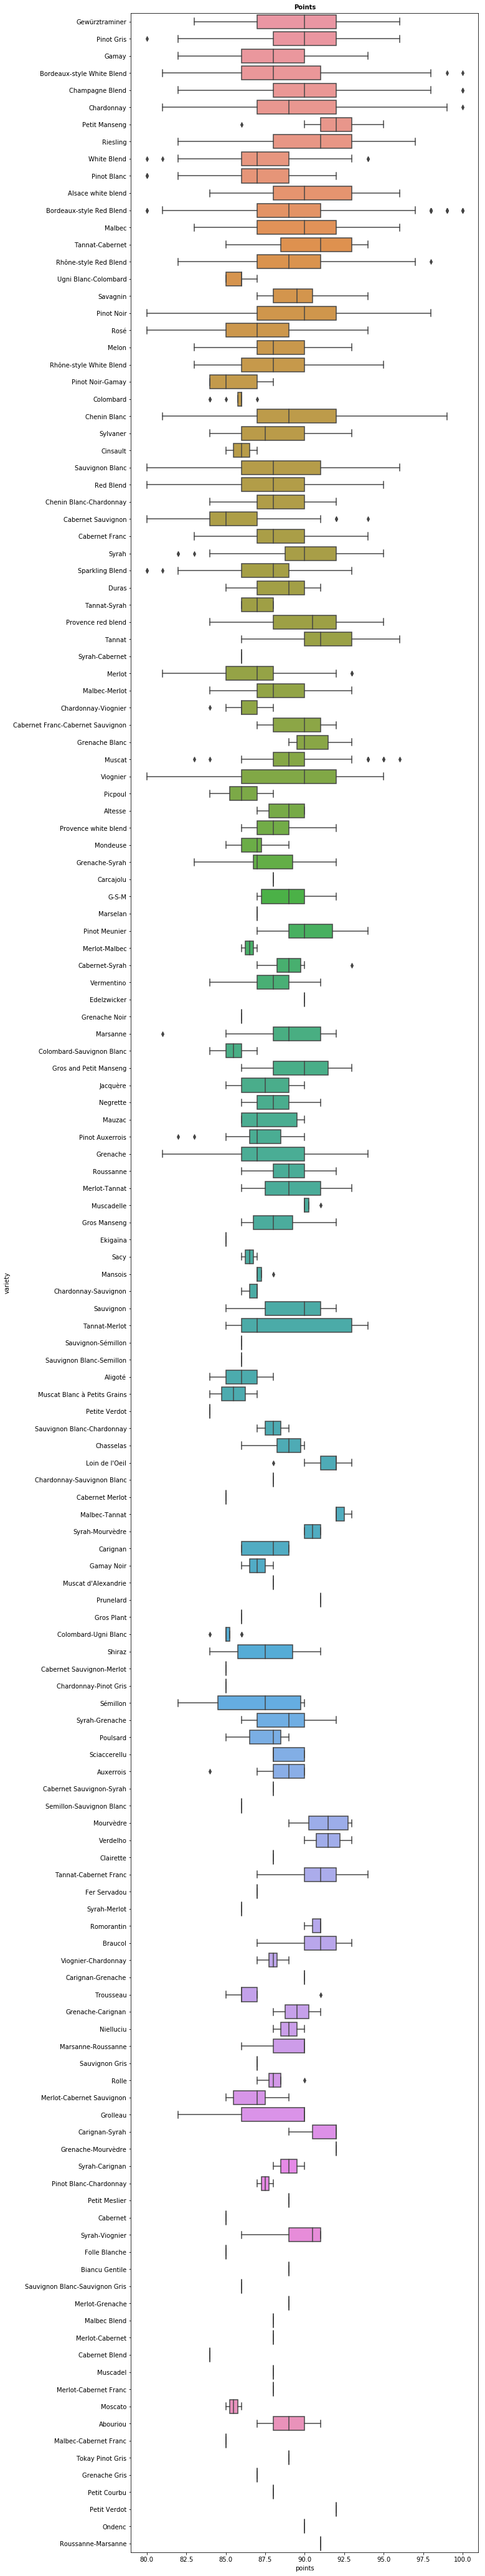

In [76]:
fig, ax = plt.subplots(figsize=(10,75))
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10)
ax.set_title('Points', fontweight="bold", size=10)
ax.set_ylabel('Variety', fontsize = 10)
ax.set_xlabel('Points', fontsize = 10)
sns.boxplot(x='points', y='variety', data=french)

Based on above, in terms of wines from France, I should drink Mourvedre, Tannat and Tannat Merlot, Tannat Cabernet blend, Carignan-Syrah, Braucol, Cabernet Franc, Verdelho, Loin de I'oeil, Alsace white blend. 

In [77]:
german=df_from.loc['Germany']
german.head()

,variety,points,province
country,,,
Germany,Gewürztraminer,87,Rheinhessen
Germany,Riesling,87,Mosel
Germany,Riesling,86,Rheinhessen
Germany,Riesling,86,Rheinhessen
Germany,Riesling,91,Rheinhessen


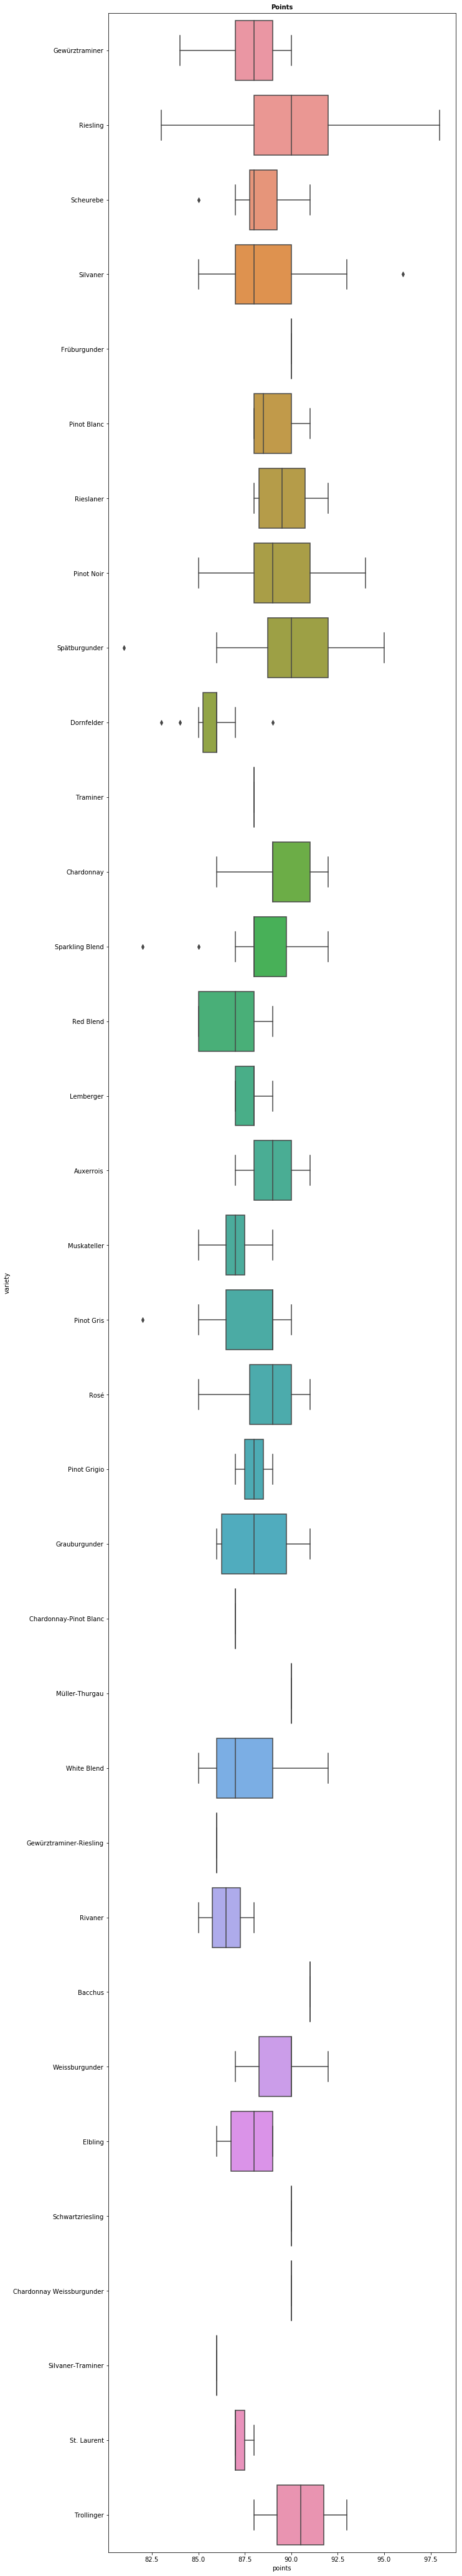

In [78]:
fig, ax = plt.subplots(figsize=(10,75))
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10)
ax.set_title('Points', fontweight="bold", size=10)
ax.set_ylabel('Variety', fontsize = 10)
ax.set_xlabel('Points', fontsize = 10)
sns.boxplot(x='points', y='variety', data=german)

Based on above, in terms of wines from German, i should drink, Trollinger, Chardonnay, Spatburgunder, Reisling.

In [79]:
austria=df_from.loc['Austria']
austria.head()

,variety,points,province
country,,,
Austria,Grüner Veltliner,88,Burgenland
Austria,Blaufränkisch,89,Leithaberg
Austria,Grüner Veltliner,92,Kremstal
Austria,Riesling,92,Kremstal
Austria,Grüner Veltliner,92,Kremstal


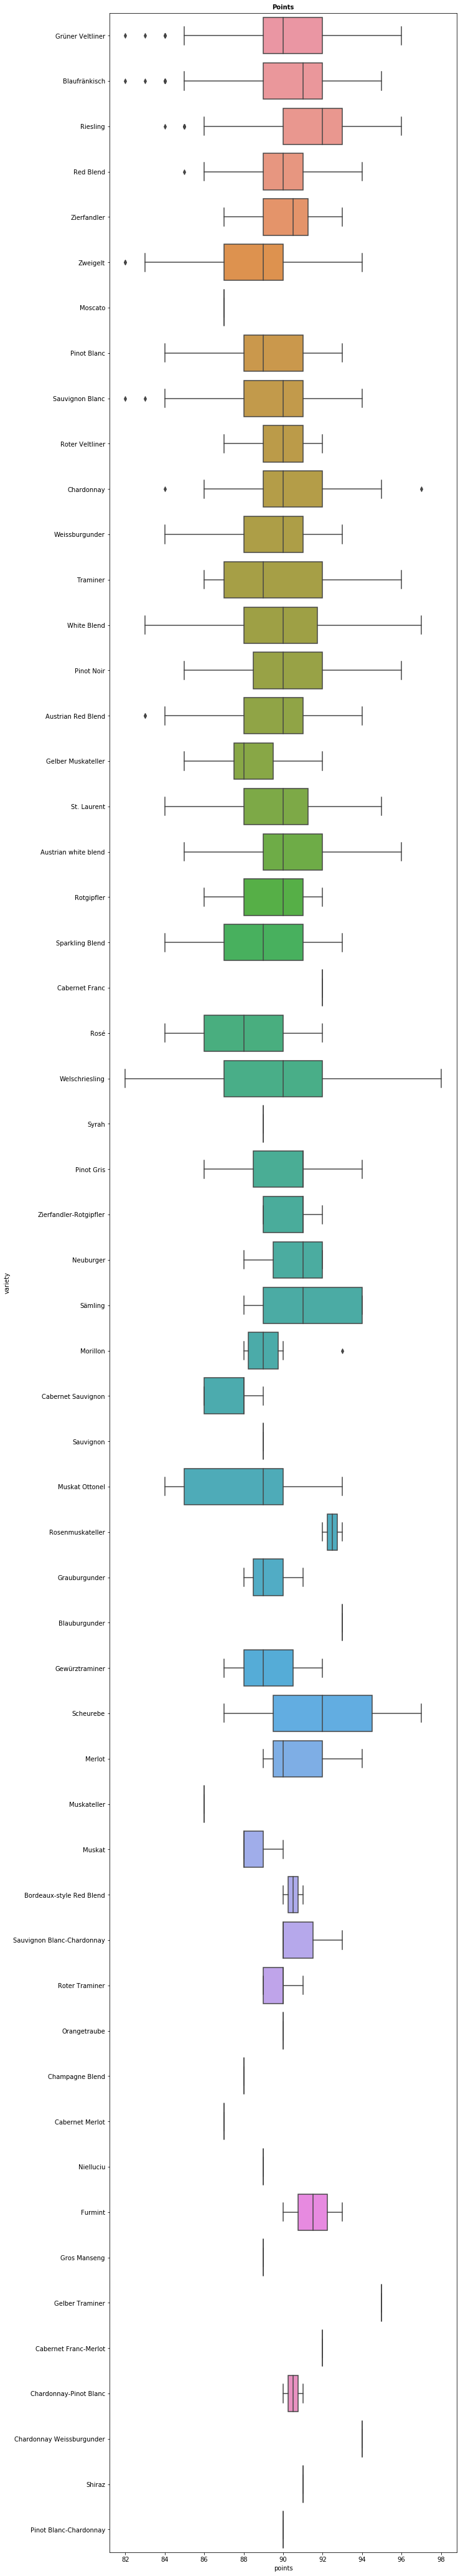

In [80]:
fig, ax = plt.subplots(figsize=(10,75))
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10)
ax.set_title('Points', fontweight="bold", size=10)
ax.set_ylabel('Variety', fontsize = 10)
ax.set_xlabel('Points', fontsize = 10)
sns.boxplot(x='points', y='variety', data=austria)

Based on the above, in terms of wines from Austria, i should drink Chardonnay,Furmint, Savignon Blanc & Chardonnay blend, Merlot and Scheurebe.

I want to make sure these meets my budget. 

In [81]:
df_US=df[(df['country']=='US') & (df['price']<15.0) & (df['points']>90)]
df_US.head(100)

,country,description,points,price,province,title,variety,winery
5051,US,"With rich melon aromas, ripe apple flavors and...",91,14.0,California,Wildhurst 2013 Reserve Sauvignon Blanc (Lake C...,Sauvignon Blanc,Wildhurst
6339,US,Another clean and tasty bottling from this lab...,91,12.0,California,Noble Vines 2016 152 Pinot Grigio (San Bernabe),Pinot Grigio,Noble Vines
7381,US,"This cool-climate Riesling, technically off-dr...",92,14.0,Washington,AntoLin Cellars 2010 Glacier Estate Vineyard R...,Riesling,AntoLin Cellars
7803,US,"Blended with 12% Grenache and 8% Roussanne, th...",92,14.0,Washington,Waterbrook 2012 Syrah (Columbia Valley (WA)),Syrah,Waterbrook
8066,US,Crisp citrus aromas and fresh lemon and grapef...,91,14.0,California,Murphy-Goode 2013 The Fumé Sauvignon Blanc (No...,Sauvignon Blanc,Murphy-Goode
10237,US,"This sophisticated, dry and affordable wine wi...",91,14.0,California,Ravenswood 2013 Old Vine Zinfandel (Lodi),Zinfandel,Ravenswood
10302,US,"Balance, elegance and varietal purity mark thi...",91,13.0,California,Sebastiani 2009 Chardonnay (Sonoma County),Chardonnay,Sebastiani
10386,US,"A marvelous effort in a difficult year, this t...",91,9.0,Washington,Chateau Ste. Michelle 2011 Riesling (Columbia ...,Riesling,Chateau Ste. Michelle
22122,US,"A fresh and textural wine, this puts a spicy s...",91,11.0,Washington,Pacific Rim 2011 Dry Riesling (Columbia Valley...,Riesling,Pacific Rim
26101,US,"With full ripeness, density and concentration,...",91,8.0,Washington,Snoqualmie 2006 Winemaker's Select Riesling (C...,Riesling,Snoqualmie


In [82]:
df_US[['province','variety']]

,province,variety
5051,California,Sauvignon Blanc
6339,California,Pinot Grigio
7381,Washington,Riesling
7803,Washington,Syrah
8066,California,Sauvignon Blanc
10237,California,Zinfandel
10302,California,Chardonnay
10386,Washington,Riesling
22122,Washington,Riesling
26101,Washington,Riesling


I can certainly be more selective when it comes to US. So i am going to increase the requirement point to 92

In [83]:
df_US=df[(df['country']=='US') & (df['price']<15.0) & (df['points']>91)]
df_US[['province','variety', 'description']]

,province,variety,description
7381,Washington,Riesling,"This cool-climate Riesling, technically off-dr..."
7803,Washington,Syrah,"Blended with 12% Grenache and 8% Roussanne, th..."
43193,California,Viognier,"This is a very sweet, unctuous dessert wine, w..."
44158,California,Sauvignon Blanc,This is one of the best values in Sauvignon Bl...
52776,California,Vermentino,Uvaggio is making a serious case for Lodi Verm...
59823,California,Viognier,"This is a very sweet, unctuous dessert wine, w..."
80542,California,Meritage,A Bordeaux-style blend made primarily from Mer...
105015,Oregon,Pinot Gris,"Absorbingly complex with racy, textural, miner..."
107615,Washington,Riesling,"This is the first Riesling from Whitman, and i..."
128010,Washington,Riesling,A classic Washington tasting-room Riesling—onl...


Here is the final list for US
<ul>
    <li>Riesling</li>
    <li>Syrah</li>
    <li>Viognier</li>
    <li>Meritage</li>
    <li>Pinot Gris</li>
</ul>

In [84]:
df_FR=df[(df['country']=='France') & (df['price']<15.0) & (df['points']>91)]
df_FR[['province','variety', 'description']]

,province,variety,description
9609,Southwest France,Malbec-Merlot,"A rich, Port-like wine that is full and concen..."
24428,Bordeaux,Bordeaux-style Red Blend,A good dash of Petit Verdot in the blend has g...
48651,Beaujolais,Gamay,"Dark-hued wine, dominated by acidity as well a..."
68720,Southwest France,Tannat-Cabernet Franc,"This is smooth, rich and elegant, with black f..."
94202,Southwest France,Tannat,"At the hands of Pierre Laplace, Tannat becomes..."
94214,Southwest France,Tannat-Cabernet,A rich wine in which the firm Tannat character...
98416,Southwest France,Tannat-Cabernet Franc,"An herbal and perfumed wine, its welcoming sof..."
105022,Southwest France,Malbec,"This is a serious, firmly structured wine, imp..."
105028,Southwest France,Tannat-Cabernet Franc,"Perfumed wine, from a blend of Tannat and Cabe..."


Here is the final list for FR
<ul>
    <li>Malbec-Merlot</li>
    <li>Bordeaux-style Red Blend</li>
    <li>Gamay</li>
    <li>Tannat-Cabernet-Franc</li>
    <li>Tannat</li>
    <li>Tannat-Cabernet-Franc</li>
    <li>Malbec</li>
</ul>

In [85]:
df_AU=df[(df['country']=='Austria') & (df['price']<15.0) & (df['points']>91)]
df_AU[['province','variety', 'description']]

,province,variety,description
3017,Burgenland,Zweigelt,"This is a powerful, wood-aged wine. It's still..."
9458,Kremstal,Grüner Veltliner,Everything is still tightly coiled: the intens...
15590,Kamptal,Grüner Veltliner,Riper aspects of Mirabelle plum join the aroma...
35002,Carnuntum,Pinot Noir,"Slight pepper spice mingles with subdued, tart..."
85807,Kamptal,Grüner Veltliner,Lifted notes of Conference pear blended with c...
88440,Burgenland,Furmint,Gorgeously lifted notes of mint and crushed ci...


Here is the final list for AU
<ul>
    <li>Zweigelt</li>
    <li>Gruner Veltliner</li>
    <li>Pinot Noir</li>
    <li>Furmint</li>
</ul>

In [86]:
df_IT=df[(df['country']=='Italy') & (df['price']<15.0) & (df['points']>91)]
df_IT[['province','variety', 'description']]

,province,variety,description


In [87]:
df_AUS=df[(df['country']=='Australia') & (df['price']<15.0) & (df['points']>91)]
df_AUS[['province','variety', 'description']]

,province,variety,description


In [88]:
df_IN=df[(df['country']=='India') & (df['price']<15.0) & (df['points']>91)]
df_IN[['province','variety', 'description']]

,province,variety,description


In [89]:
df_SW=df[(df['country']=='Switzerland') & (df['price']<15.0) & (df['points']>91)]
df_SW[['province','variety', 'description']]

,province,variety,description


Based on this analysis, there are no Italian, Australian and Indian wines that has a score of over 91 and below 15 dollars. So i am removing Italy from my list. However, I want to keep one option for myself as try outs with these countries. I am going to pick India.

In [90]:
df_IN=df[(df['country']=='India') & (df['price']<15.0) & (df['points']>90)]
df_IN[['province','variety', 'description']]

,province,variety,description
56903,Nashik,Shiraz,"Aromas of blackberry, cherry preserves, white ..."


Based on above I can try Shiraz from India. 

In [91]:
df_IT=df[(df['country']=='Italy') & (df['price']<15.0) & (df['points']>90)]
df_IT[['province','variety', 'description']]

,province,variety,description
14998,Northeastern Italy,Pinot Grigio,White spring blossom and citrus aromas waft ou...
18313,Tuscany,Red Blend,"Kappa is a dark, brooding super Tuscan with a ..."
52976,Tuscany,Sangiovese,This earthy Chianti Classico offers bold aroma...
72077,Veneto,Glera,"Made entirely with organic grapes, this delica..."
72099,Northeastern Italy,Pinot Bianco,"Beautiful aromas of creamy apple, white flower..."


Based on above, if i go to an Italian Restaurant I will order, Pinot Grigio, Tuscany Red Blend, Glera or Pinot Bianco.

I have been analyzing the data set based on country and known varieties such as Cabernet, Pinot Noir and Pino Gris. I should also look into the description. Description is based on flavor which can be very subjective. So should I expect a correlation between description and points? If there is one, shouldnt that be bias? 

In [92]:
description=df[['description', 'points']]
description.head(100)

,description,points
0,"Aromas include tropical fruit, broom, brimston...",87
1,"This is ripe and fruity, a wine that is smooth...",87
2,"Tart and snappy, the flavors of lime flesh and...",87
3,"Pineapple rind, lemon pith and orange blossom ...",87
4,"Much like the regular bottling from 2012, this...",87
5,Blackberry and raspberry aromas show a typical...,87
6,"Here's a bright, informal red that opens with ...",87
7,This dry and restrained wine offers spice in p...,87
8,Savory dried thyme notes accent sunnier flavor...,87
9,This has great depth of flavor with its fresh ...,87


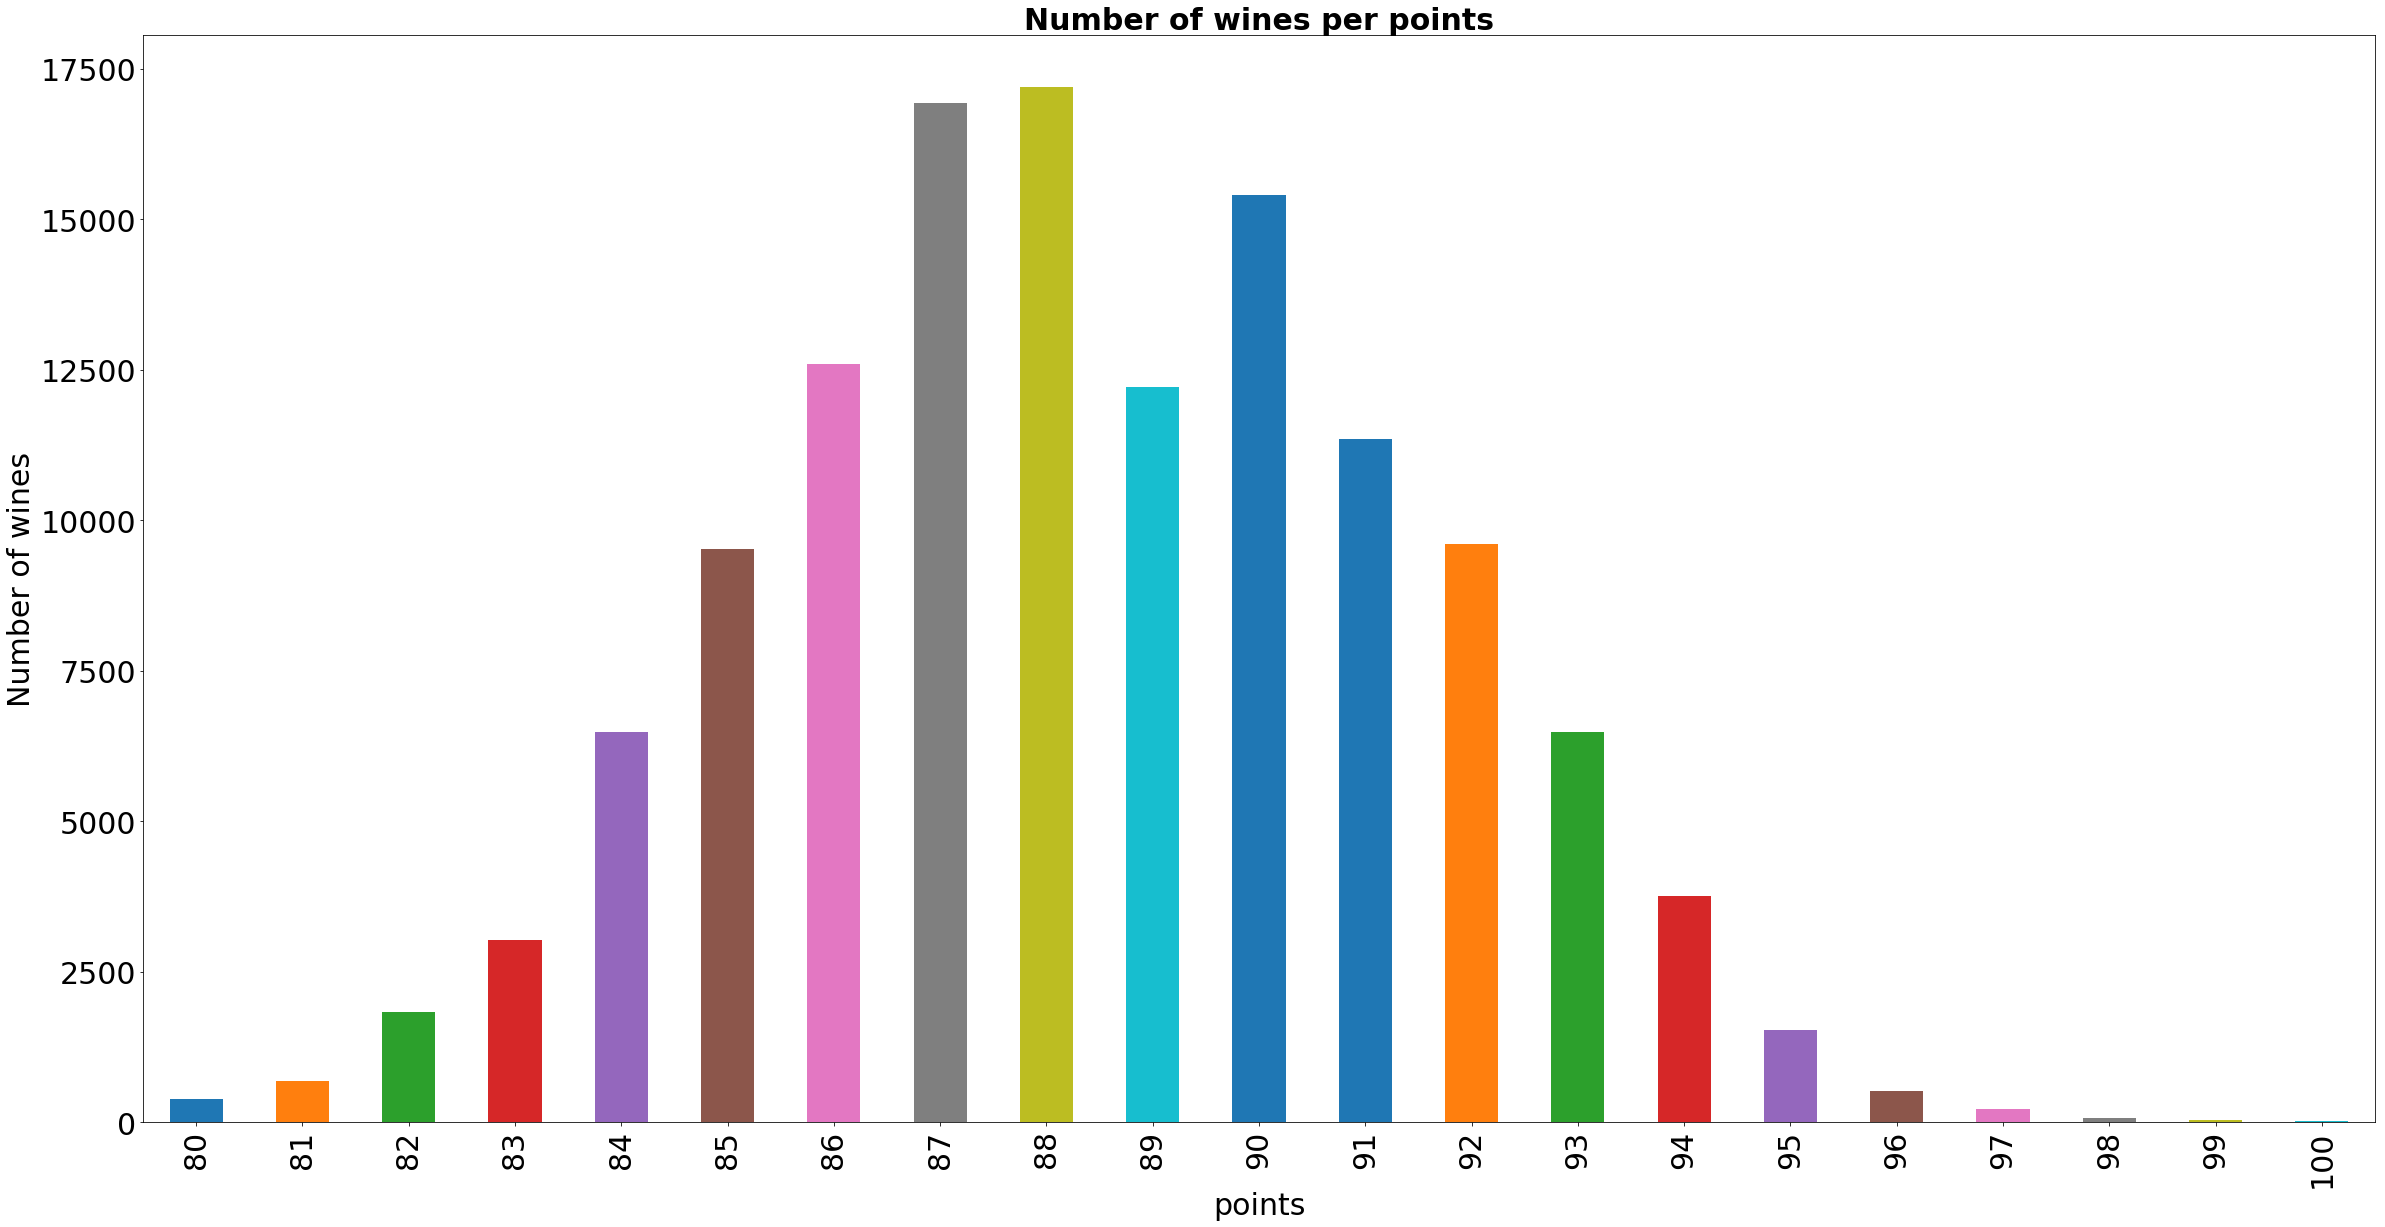

In [93]:
fig, ax = plt.subplots(figsize=(40,20))
plt.xticks(fontsize=30) 
plt.yticks(fontsize=30)
ax.set_title('Number of wines per points', fontweight="bold", size=30)
ax.set_ylabel('Number of wines', fontsize = 30)
ax.set_xlabel('Points', fontsize = 30)
description.groupby(['points']).count()['description'].plot(ax=ax, kind='bar')

In [94]:
description=description.assign(description_length=description['description'].apply(len))
description.head()

,description,points,description_length
0,"Aromas include tropical fruit, broom, brimston...",87,172
1,"This is ripe and fruity, a wine that is smooth...",87,227
2,"Tart and snappy, the flavors of lime flesh and...",87,186
3,"Pineapple rind, lemon pith and orange blossom ...",87,199
4,"Much like the regular bottling from 2012, this...",87,249


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


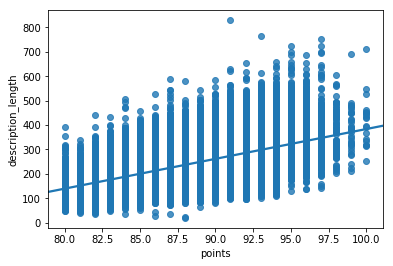

In [95]:
sns.regplot(x='points', y='description_length', data=description)

Well, there is a linear correlation between points (how good the wine is) and description (the amount of text that is in the description)

In [96]:
df_wine.head()

,variety,points,price
country,,,
Italy,White Blend,87,35.363389
Portugal,Portuguese Red,87,15.000000
US,Pinot Gris,87,14.000000
US,Riesling,87,13.000000
US,Pinot Noir,87,65.000000


**Conclusion: 

**My final list- countries**

* American
* French
* German
* Austria
* India

I am keeping India as an intersting option; as I have never had Indian wine in the past and would like to try.

**My final list-  type of wines from US**

* Meritage from California 
* Syrah from Washington
* Viognier from California
* Pinot Gris from Oregon
* Riesling from Washington

**My final list- of type of wines from France:**

Malbec-Merlot from Southwest France
Bordeaux-style Red Blend from Bordeaux
Tannat-Cabernet Franc from Southwest France
Tannat-Cabernet from Southwest France
Malbec from Southwest France 

**My final list- type of wines from Germany**

Zweigelt from Burgenland
Gruner Veltliner from Kremstal or Kamptal
Pinot Noir from Carnuntum
Furmint from Burgenland 

**I will try Shiraz from Nashik India.**

**My final list-type of wines from Italy (I included this to cover the user case of Italian Restaurant)**

* Pinot Grigio from Northeast Italy
* Red Blend from Tuscany
* Sangiovese Tuscany
* Glera Glera
* Pinot Blanco Northeastern Italy

Well, I think I know what I am doing now. I will be on vacation for couple of days and will get a chance to start testing my analysis. There are a lot more I can do with this data set including create, test and train a predictive model, however I have limited bandwitdh and will leave it here for now.

Cheers!